# Neural net intro


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

**Basic Dataset**

In [40]:
n = 5

roots = np.random.uniform(-2, 3, n)
polyCoefficients = np.poly(roots) 

X = np.arange(-20, 20) 
y = np.polyval(polyCoefficients, X) 


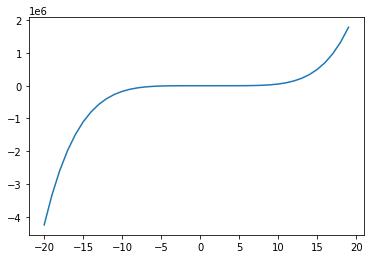

In [41]:
plt.plot(X, y)

In [42]:
X = X.reshape((X.shape[0], 1))

print(X, y)

[[-20]
 [-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]] [-4.24886534e+06 -3.33493742e+06 -2.58545023e+06 -1.97715187e+06
 -1.48909252e+06 -1.10250446e+06 -8.00682047e+05 -5.68861718e+05
 -3.94101995e+05 -2.65163485e+05 -1.72388876e+05 -1.07582940e+05
 -6.38925319e+04 -3.56865911e+04 -1.84361391e+04 -8.59428080e+03
 -3.47620452e+03 -1.13918171e+03 -2.62567108e+02 -2.77986700e+01
  1.60240561e+00  3.16841461e-02 -1.98506586e-01  1.11409241e+01
  1.42195830e+02  7.19028826e+02  2.40561929e+03  6.32386337e+03
  1.41735740e+04  2.83524807e+04  5.20762301e+04  8.94983853e+04
  1.45830426e+05  2.27461750e+05  3.42079669e+05  4.98789415e+05
  7.08234134e+05  9.82714889e+05  1.33631066e+06  1.78499835e+06]


# Create a model

nn(1).svg

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])

A neural network is initialized by setting the values of the network's weights and biases to initial values, typically chosen randomly. This process ensures that the network starts with a unique configuration, and helps to prevent the network from getting stuck in a local minimum or converging to the same solution as other networks.

The choice of initialization method can have a significant impact on the performance of a neural network. In general, it is important to choose an initialization method that is well-suited to the specific characteristics of the network and the task it is being trained for. 

Below is an example of the random initalisation

In [34]:
prediction = model(X[:1]).numpy()
prediction

array([[-19.526026]], dtype=float32)

Training a neural network involves feeding it a large number of examples, along with the correct output or prediction. The network uses these examples to adjust the values of its internal parameters, called weights and biases, in order to improve its ability to make accurate predictions.

This process is typically repeated many times. As the network processes each example, it compares its own prediction to the correct output, and uses this comparison to calculate an error value. The error value is then used to update the network's weights and biases in a way that reduces the overall error and improves the network's accuracy.

The goal of training is to find a set of weights and biases that enable the network to make accurate predictions on new data, and to generalize well to data that it has not seen before.



**Calculating an error value**

Mean squared error (MSE) is a measure of the difference between the predicted value of a model and the true value of the data that the model is trying to predict. It is commonly used as a loss function in machine learning algorithms, especially in regression tasks where the goal is to predict a numerical value.

To calculate the mean squared error, the difference between the predicted value and the true value is squared for each data point, and then the average of these squared differences is taken over all data points. This gives a measure of the average error that the model makes on the data, and can be used to evaluate the performance of the model.

In [20]:
loss_function = tf.keras.losses.MeanSquaredError()
loss_value = loss_function(y[:1], predictions).numpy()
print(loss_value)

# What is it doing
print((y[:1] - prediction) ** 2)

1131.4225
[[1131.42236915]]


**Compiling**

AKA preparing the network for training. This involves specifying the optimiser that will be used to train the network, as well as any other hyperparameters or configurations that are needed for the training process, e.g loss function.



**Optimisers**

Optimisers are a key component of the training process for machine learning models, including neural networks. They are responsible for computing the gradient of the loss function with respect to the model's parameters, and using this gradient information to update the parameters in a way that reduces the loss and improves the model's performance.

In [35]:
model.compile(
  optimizer = 'adam', 
  loss = 'mean_absolute_error', 
  metrics = ['accuracy']
)

Training the model: 

In [36]:
stats = model.fit(
  X, 
  y, 
  verbose=False,
  epochs=1000
)

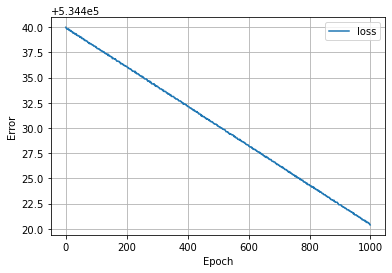

In [37]:
plt.plot(stats.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


2/2 [==============================] - 0s 4ms/step


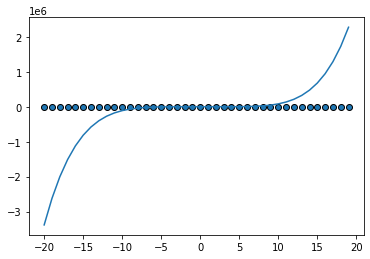

In [38]:
predictions = model.predict(X)

plt.scatter(X, predictions, edgecolors=(0, 0, 0))
plt.plot(X, y)

# Improvements
Each layer in a neural network is responsible for learning a different level or abstraction of the data, and adding more layers allows the network to learn multiple levels of abstraction and represent the data at different levels of detail.

Adding more neurons to a layer in a neural network increases the capacity of the network to learn and represent complex patterns in the data. Each neuron in a layer is responsible for learning and representing a different aspect or feature of the data, and adding more neurons allows the network to learn and represent more features.

In [92]:
# Create new model

model_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_v2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1), 
  loss='mean_squared_error',
)

stats_v2 = model_v2.fit(
  X,
  y, 
  verbose = False,
  batch_size=10,
  epochs = 2500
)

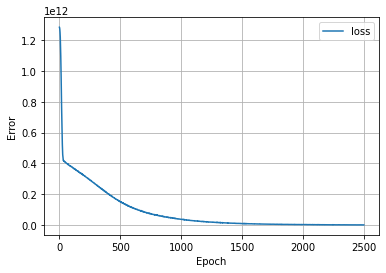

In [93]:
plt.plot(stats_v2.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

See how well it has fit the data

2/2 [==============================] - 0s 4ms/step


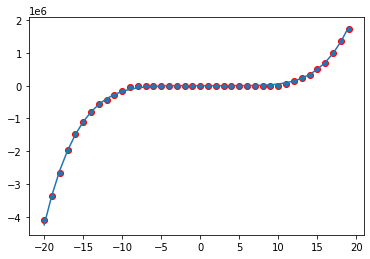

In [94]:
predictions_v2 = model_v2.predict(X)

plt.scatter(X, predictions_v2, edgecolors=(1, 0, 0))
plt.plot(X, y)